Elit Jasmine Dogu (ejd5mm)       
DS 5001    
5 May 2021    
*Third year, Undergraduate Student*     



# What This File Contains:
- Data Cleaning 
- Wordcloud of Entire Novel
- POS using NLTK
- Looking at Most Frequent Nouns
- Looking at Most Frequent Verbs
    - Looking at Nouns in Relation to Verbs
- Character Interactions
- Novel Summary using NLP Techniques
- Sentiment Analysis 
    - Token Level
    - Sentence Level 
        - VADER Library and Sentiment Intensity Analyzer
        

The goal of this notebook is to gain a better understanding of the most important characters, what types of actions they take, theeir interactions along with a better understanding of the novel as a whole. This is done through a summarization of the plot and a sentiment analaysis, which takes a deep dive into understanding the text at a specific level.

## Imports

In [1]:
import re
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import nltk
from nltk.corpus import wordnet as wn
from nltk.stem.wordnet import WordNetLemmatizer
import seaborn as sns
import networkx as nx
#will import more as needed

## Data Set Up

In [2]:
#creating subdirectories
data_in = './data_in'
data_out = './data_out/file1'

## Data Cleaning

In [3]:
#reading in the txt file
epub_file = "The-Great-Gatsby.txt" # Source file- Project Guttenburg 
epub_read = open("{}/{}".format(data_in, epub_file), 'r', encoding='utf-8-sig').readlines()[57:6427] #gets rid of front and back matter
txt = " ".join(list(epub_read)) #joins the epub_read together since its readlines() -- will use NLTK to tokenize

Above, the .txt file is being read. The readlines() allows us to grab each line of the txt file one by one. By adding on the [57:6427], we are removing the front and back matter of the novel. This is all text that is irrelevant to the plot of the novel, and is text detailing information about the publication of the novel as well as about Project Gutenberg. By visually looking at the txt file (and by coding in other files), we found that 57 was the true start of the novel and 6247 was the true end of the novel. After the novel is fully read, we join it as one string so that we can later use word_tokenize() and sent_tokenize(), which can be seen a few chunks below.

In [4]:
txt = re.sub('[IVXLCM]+\n \n', '', txt) #cleans up the roman numerals that are present for chapter headings
txt = re.sub('\n \n', '', txt) #cleans up the new lines
txt = re.sub('\n', '', txt) #continues to clean up the new line indicator
txt = re.sub('------------------------------------------------------------------------', '', txt) #clean up the dashes in novel  

Here, we are cleaning the roman numericals which indicate the chapter headers. Along with this, other things are cleaned up; for example, the long line of dashes is irrelevant in our purposes and therefore can be removed.

## Looking at Words in Txt File As a WordCloud

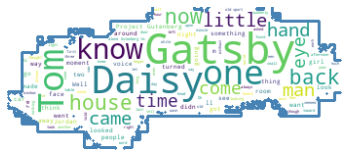

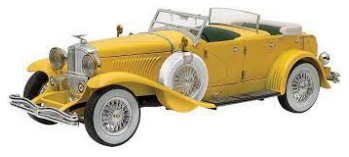

In [5]:
from os import path
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import os

from wordcloud import WordCloud, STOPWORDS

# get data directory (using getcwd() is needed to support running example in generated IPython notebook)
d = path.dirname(__file__) if "__file__" in locals() else os.getcwd()

# Read the whole text
text = open(path.join(d, 'data_in/The-Great-Gatsby.txt')).read() 

# read the mask image
# taken from
# https://www.amazon.com/Greenlight-Great-Gatsby-Duesenberg-Die-cast/dp/B00YVCHSMQ
car_mask = np.array(Image.open(path.join(d, "data_in/gg-car.jpeg")))

stopwords = set(STOPWORDS)#setting stop words
stopwords.add("said")  #said is used a lot in the novel, getting rid of it allows us to see the more important words
stopwords.add("s")  #s is shown a lot in the wordcloud and does not play a critical role 
stopwords.add("don")  #don is shown a lot in the wordcloud and does not play a critical role 
stopwords.add("t")  #t is shown a lot in the wordcloud and does not play a critical role 
stopwords.add("d")  #d is shown a lot in the wordcloud and does not play a critical role 

wc = WordCloud(background_color="white", max_words=2000, mask=car_mask,
               stopwords=stopwords, contour_width=3, contour_color='steelblue')

# generate word cloud
wc.generate(text)

# store to file
wc.to_file(path.join(d, "./data_out/file1/car_output.png"))

# show
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.figure()
plt.imshow(car_mask, cmap=plt.cm.gray, interpolation='bilinear')
plt.axis("off")
plt.show()

wc.to_file('./data_out/file1/entire_novel_car.png')

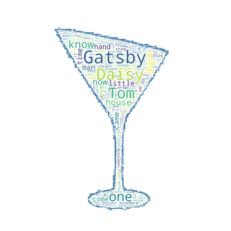

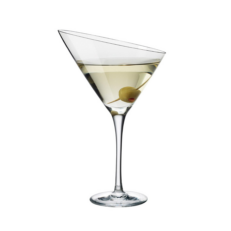

In [6]:
from os import path
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import os

from wordcloud import WordCloud, STOPWORDS

# get data directory (using getcwd() is needed to support running example in generated IPython notebook)
d = path.dirname(__file__) if "__file__" in locals() else os.getcwd()

# Read the whole text
text = open(path.join(d, 'data_in/The-Great-Gatsby.txt')).read() 

# read the mask image
# taken from
# https://www.wayfair.com/Orren-Ellis--Ritwik-7-oz.-Martini-Glass-932414-L1235-K~W001974865.html?refid=GX490221401171-W001974865&device=c&ptid=878268225820&network=g&targetid=pla-878268225820&channel=GooglePLA&ireid=36408915&fdid=1817&gclid=CjwKCAjwnPOEBhA0EiwA609ReTlbLzmis1SsEZhwXomzHBdtkqYJmHh0LQ2XWCzdaRepnOjlEAdb7xoCjB8QAvD_BwE
martini_mask = np.array(Image.open(path.join(d, "data_in/martini.jpeg")))

stopwords = set(STOPWORDS)#setting stop words
stopwords.add("said")  #said is used a lot in the novel, getting rid of it allows us to see the more important words
stopwords.add("s")  #s is shown a lot in the wordcloud and does not play a critical role 
stopwords.add("don")  #don is shown a lot in the wordcloud and does not play a critical role 
stopwords.add("t")  #t is shown a lot in the wordcloud and does not play a critical role 
stopwords.add("d")  #d is shown a lot in the wordcloud and does not play a critical role 

wc = WordCloud(background_color="white", max_words=2000, mask=martini_mask,
               stopwords=stopwords, contour_width=3, contour_color='steelblue')

# generate word cloud
wc.generate(text)

# store to file
wc.to_file(path.join(d, "data_out/file1/entire_novel_martini.png"))

# show
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.figure()
plt.imshow(martini_mask, cmap=plt.cm.gray, interpolation='bilinear')
plt.axis("off")
plt.show()

wc.to_file('./data_out/file1/entire_novel_martini.png')

In the wordcloud above, I chose to first use the car that was in the Great Gatsby movie as the mask image for the wordcloud because cars were used (in the novel) to symbolize a lot of different things. They were used as status symbols for some of the charaacters as well as for the American society in general. Car crashes are signs of socio-economic status and moral collapse. Similarly, in the novel, Fitzgerald uses the car to represent the reckless behavior of the high-status, wealthy individuals.

I then chose to use a martini glass as the mask image for the wordcloud because these glasses were, in a way, representative of the parties that Gatsby would have. Especially in the movie, there would be scenes where Gatsby would be seen holding alcoholic beverages in hand. Because this scene from the movie reminded me of the novel, I decided to go with it. In a way, the martini glass can be seen as a way to represent wealth and parties, which again ties in to one of the themes of the novel.

Above, we see that the most common words are as expected; they are "Gatsby", "Tom", and "Daisy". These are the main characters in the novel, so it makes sense that they are the most common. Amongst the other most common words, we see a lot of time related words. For example, we see "now", "time" , "came", "back", and "come". Interesting enough, we do not see words related to the locations that are included in the novel like "West" ,"East", and "Egg". But, we do see the word "house", a word relating to a location, which also make sense as the novel is heavily focused on Gatby's house.

However, a few words I would have expected to appear here would have been "green", "light", "old", "sport", "love", and "Nick". I would have expected "green" and "light" to appear a lot because the novel focuses a great ton on the green light and what it represents explicitly to Gatsby and implicitly to the American public (the idea of the 'American Dream'). I would have also expected the words old and sport to appear since Gatsby used the phrase "old sport" very commonly when talking to people; this, once again, adds to the theme of a division in class. Gatsby using this quote shows his wealth and education. In addition, I would have expected the word "love" since this is one of the big themes of the novel; there is a lot of mention of love and of affairs. One specific example of this is when Gatsby confesses his still existing feelings for Daisy. Lastly, Nick was one of the main characters in the novel. I would have expected his name to appear more as characters like Tom, Daisy, Gatsby, or Jordan referred to him. One of the reasons why Nick perhaps was not a common term, however, could be due to the role he had in the novel as narrator. Because he was the narrator, there may have been no need to refer to his name constantly. This goes to show the different impacts that the author's choice of formatting and structuring has. 

To make the wordcloud more obvious what shape it is embodying, I also included the image of the car and the martini glass that was used for the mask image. This car is the car from the movie version of the Great Gatsby. It is interesting looking at the most common words in the novel because as we will see below in the rest of the notebook, the most common words that show up here also show up when looking just at nouns or just at verbs. 

Note: both of the car and the martini glass have the same wordcloud output. I decided to do both because I felt like the car as a mask image was not super obvious at first glance, whereas with the martini glass it's very clear what the shape is meant to be.


## Adding Part of Speech

In [7]:
pos = nltk.pos_tag(nltk.word_tokenize(txt))
pos = np.array(pos).transpose()

In [8]:
pos #part of speech, given as array

array([['In', 'my', 'younger', ..., 'the', 'past', '.'],
       ['IN', 'PRP$', 'JJR', ..., 'DT', 'NN', '.']], dtype='<U25')

By using the NLTK package, we can tokenize our long string containing the novel and add the different parts of speech associated with each token.

In [9]:
df_pos = pd.DataFrame(pos)
df_pos

,0,1,2,3,4,5,6,7,8,9,...,59600,59601,59602,59603,59604,59605,59606,59607,59608,59609
0,In,my,younger,and,more,vulnerable,years,my,father,gave,...,the,current,",",borne,back,ceaselessly,into,the,past,.
1,IN,PRP$,JJR,CC,RBR,JJ,NNS,PRP$,NN,VBD,...,DT,JJ,",",JJ,RB,RB,IN,DT,NN,.


In [10]:
df_pos_transpose = df_pos.T #formatting the dataframe so that its more readable and useable

In [11]:
df_pos_renamed = df_pos_transpose.rename(columns={0: "Word", 1: "POS"}) #renaming columns
df_pos_renamed

,Word,POS
0,In,IN
1,my,PRP$
2,younger,JJR
3,and,CC
4,more,RBR
...,...,...
59605,ceaselessly,RB
59606,into,IN
59607,the,DT
59608,past,NN


In [12]:
df_pos_renamed['Length'] = df_pos_renamed['Word'].str.len()
df_pos_renamed

,Word,POS,Length
0,In,IN,2
1,my,PRP$,2
2,younger,JJR,7
3,and,CC,3
4,more,RBR,4
...,...,...,...
59605,ceaselessly,RB,11
59606,into,IN,4
59607,the,DT,3
59608,past,NN,4


Here, in addition to the part of speecch the length of each word is added. We will now analyze statistics relating to the length of words the author of the novel decided to use.

In [13]:
df_pos_renamed.Length.describe()

count    59610.000000
mean         3.655964
std          2.487670
min          1.000000
25%          2.000000
50%          3.000000
75%          5.000000
max         25.000000
Name: Length, dtype: float64

Looking at the 'Length' column, we can see the average word is about 3-4 words long (specifically, 3.66). The minimum length of a word is one, which can be seen with words like "a". 25% of the words in the novel fall to be two letters long. An example of this could be "my", "he", "in", etc. About 50% of words fall to be 3 letters long. 75% of words are a length of five letters. And lastly, the maximum length of a word is 25. 

In [14]:
df_pos_renamed[df_pos_renamed['Length']==25]

,Word,POS,Length
48574,unscrupulously—eventually,RB,25


I was curious to see what word could possibly be 25 letters long. As we can see above, our tokenization was not completed flawlessly. This is one of the things to keep in mind when using packages or creating conditions by hand. Although most of the time, our programs will run as intended, there can be outliers, like the example above, where things may be misinterpreted incorrectly.

In [15]:
df_pos_renamed.to_csv('{}/Great-Gatsby-POS.csv'.format(data_out))

## Looking at Most Frequent Nouns

In [16]:
nouns = pos[0][pos[1] == 'NNP'] #looking at Nouns
nouns = pd.Series(nouns)
nouns_df = pd.DataFrame(nouns)

for i in ['Mr.','Mrs.', "’", '…' , ',', '”', '“', '*', 'Oh','Egg','New','York','West','East']: #removes these from the nouns we are looking at -- irrelevant
    nouns = nouns.loc[nouns != i]

In [17]:
nouns_df = nouns_df.rename(columns={0: "Word"})

Here, we are looking just at the Nouns of the novel. It is important to note that the word 'East' would have been important to look at in relation to the phrase 'East Egg'. The same can be said for the word 'West' in relation to phrase 'West Egg'. Although 'East' and 'West' by themselves do not mean much, they are critical locations in the novel that are mentioned multiple times. Lastly, the phrase 'New York' would also be interesting to look at. However, since what we are looking at is the txt file tokenized, and are unigrams not bigrams, these words all appear by themselves rather than in their belonging pairs. As such, I decided to remove them from this step of the analysis for the time being. We will focus on the characters.

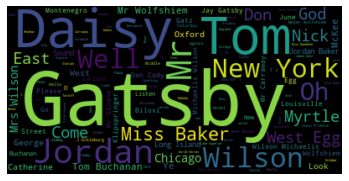

<Figure size 432x288 with 0 Axes>

In [18]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS

# get data directory (using getcwd() is needed to support running example in generated IPython notebook)

wc = WordCloud().generate(' '.join(nouns_df['Word']))

plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.figure()
plt.show()

wc.to_file('./data_out/file1/nouns.png')

We can use this wordcloud to see the most emphasized and frequently used nouns in the novel. Although we will explore this in detail below, we can see that Gatsby and Daisy are amongs the most frequently used nouns. This makes sense as the novel revolves around Gatsby, and Gatsby's relationship with Daisy is critical to the plot. To make it clearer the words we are looking at, I did not use a masking image for this to shape the WordCloud into the shape of a car.

In [19]:
top_fifteen_series = nouns.value_counts().sort_values(ascending = False)[:15] #top ten most frequent nouns
top_fifteen_df = pd.DataFrame(top_fifteen_series)

In [20]:
top_fifteen_df= top_fifteen_df.reset_index() #resetting index - need index (nouns) as a column
top_fifteen_df= top_fifteen_df.rename(columns={"index": "Noun", 0: "Count"}) #renaming columns
top_fifteen_df

,Noun,Count
0,Gatsby,249
1,Tom,188
2,Daisy,180
3,Wilson,77
4,Jordan,70
5,Baker,39
6,Miss,34
7,Well,32
8,Wolfshiem,29
9,Myrtle,23


In [21]:
nouns[nouns == 'Nick'].value_counts() #number of times the name Nick is mentioned

Nick    22
dtype: int64

Looking at the `top_fifteen_df`, I was surprised to see that the name 'Nick', the narrator of the book, did not make it higher in the top 15 nouns in the novel. To me, Nick's character felt critical as he was the bridge between a lot of the characters. One assumption as to why his name was perhaps not used often can be because he was the narrator, therefore, there was less of a need to address him by name. However, it was still very interesting to see that Nick's name was the 10th most frequent noun. 

In [22]:
top_fifteen_df.to_csv('{}/Great-Gatsby-Top-Fifteen-Names.csv'.format(data_out)) #saving the file 

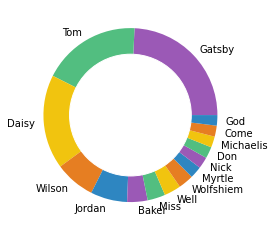

In [23]:
import matplotlib.pyplot as plt
 
# Create a circle at the center of the plot
my_circle = plt.Circle( (0,0), 0.7, color='white') #creating a circle for the middle of donut plot

plt.pie(top_fifteen_df['Count'], labels=top_fifteen_df['Noun'], colors=['#9B59B6','#52BE80','#F1C40F','#E67E22','#2E86C1']) #colors gotten from https://htmlcolorcodes.com/
p = plt.gcf() 
p.gca().add_artist(my_circle)
plt.show() #displaying/showing plot

A donut plot of the fifteen most frequently used nouns to show the distribution of each relative to one another.

In [24]:
tfs_entries = nouns.value_counts().sort_values(ascending = False)[:30].index

## Looking at People and Places

Below, we apply lemmatization to help us extract bi-grams. In these bi-grams, the first word is a noun and the second word is a verb. 


In [25]:
lemmatizer = WordNetLemmatizer()

verbs = pd.DataFrame()

for i in tfs_entries:
    for j in np.argwhere([pos[0] == i])[:,1]:
        if 'VB' in pos[1,j+1]:
            df = pd.DataFrame.from_dict({'entity': [pos[0,j]], 'verb': [lemmatizer.lemmatize(pos[0,j+1], wn.VERB)]})
            verbs = pd.concat([verbs, df], ignore_index=True)

In [26]:
name_list = []
for i in tfs_entries:
    try:
        print(i, len(verbs.loc[(~verbs.verb.str.contains('have') &  #https://www.linguasorb.com/english/verbs/most-common-verbs/
                               ~verbs.verb.str.contains('be') & 
                               verbs.entity.str.contains(i)),:].groupby('entity').verb.value_counts()))
        name_list.append(i)
    except IndexError:
        print(i, 0)   

Gatsby 32
Tom 34
Daisy 25
Wilson 16
Jordan 11
Baker 6
Miss 0
Well 0
Wolfshiem 9
Myrtle 3
Nick 0
Don 0
Michaelis 11
Come 1
God 4
Buchanan 5
Chicago 0
McKee 4
Did 0
Island 1
Catherine 2
George 0
Long 0
Oxford 0
No 0
Look 0
Sound 0
Cody 1
Jay 0
Sloane 4


Here, we use the top two most frequent verbs "have" and "be" as our verbs of interest. The words "have" and "be" apply to both people and places. After getting the list of names, we perform a cutoff on the number of different verbs that are associated with entities.

In [27]:
name_list

['Gatsby',
 'Tom',
 'Daisy',
 'Wilson',
 'Jordan',
 'Baker',
 'Wolfshiem',
 'Myrtle',
 'Michaelis',
 'Come',
 'God',
 'Buchanan',
 'McKee',
 'Island',
 'Catherine',
 'Cody',
 'Sloane']

Above, is the list we end up with. These all have verb value counts of more than 0. However, some of the nouns that we see do not make sense, so the next step is to remove them. 

In [28]:
name_list.remove('Come')
name_list.remove('Baker')
name_list.remove('God')
name_list.remove('Island')

In [29]:
name_list

['Gatsby',
 'Tom',
 'Daisy',
 'Wilson',
 'Jordan',
 'Wolfshiem',
 'Myrtle',
 'Michaelis',
 'Buchanan',
 'McKee',
 'Catherine',
 'Cody',
 'Sloane']

Here is the list after I removed all of the names I felt were irrelevant.

## Looking at Most Frequent Verbs

In [30]:
com_verbs = verbs.verb.value_counts().sort_values(ascending = False)
top_20_com_verbs = com_verbs[:20]
top_20_com_verbs

be        35
have      23
turn      10
look       9
take       7
come       7
stand      6
go         6
sit        5
say        5
lean       4
saw        3
put        3
glance     3
get        3
begin      3
call       3
damn       3
smile      2
drink      2
Name: verb, dtype: int64

Above are the 20 most frequent verbs in the novel.

In [31]:
com_verbs_df = pd.DataFrame(com_verbs).reset_index()
com_verbs_df = com_verbs_df.rename(columns={"index": "Verb", 'verb': "Count"}) #renaming columns
com_verbs_df

,Verb,Count
0,be,35
1,have,23
2,turn,10
3,look,9
4,take,7
...,...,...
118,seize,1
119,guess,1
120,start,1
121,rock,1


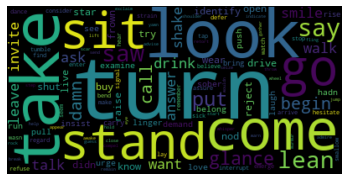

<Figure size 432x288 with 0 Axes>

In [32]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS

# get data directory (using getcwd() is needed to support running example in generated IPython notebook)

wc2 = WordCloud().generate(' '.join(com_verbs_df['Verb']))

plt.imshow(wc2, interpolation='bilinear')
plt.axis("off")
plt.figure()
plt.show()
wc2.to_file('./data_out/file1/verbs.png')

Another visualization of the most common verbs. As we can see, 'turn', 'stand', 'take', 'come' and 'look' appear to be one of the most frequent. However, the true value counts of all of these can better be seen in the dataframe above.

In [33]:
com_verbs_df.to_csv('{}/Great-Gatsby-Top-Common-Verbs.csv'.format(data_out)) #saving df 

## Looking at Nouns in Relation to Verbs

In [34]:
activities = np.zeros((16, 20))

for i, e in enumerate(name_list):
    for j, v in enumerate(top_20_com_verbs.index.values):
        activities[i, j] = len(verbs.loc[(verbs.entity.str.contains(e) & verbs.verb.str.contains(v)),:])

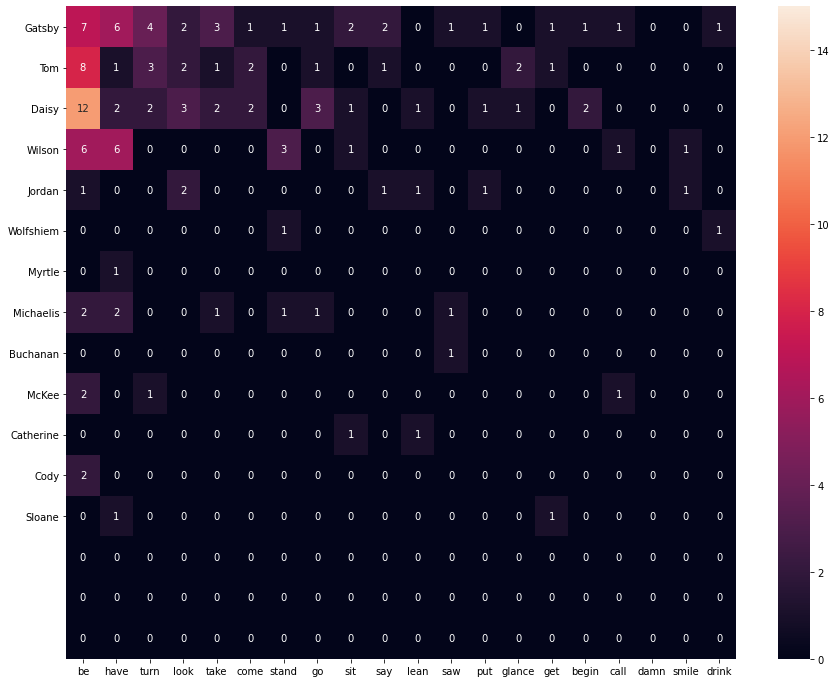

In [35]:
f, ax = plt.subplots(figsize=(15,12))
sns.heatmap(activities, annot=True, xticklabels=top_20_com_verbs.index.values, yticklabels=name_list, vmax=15, ax=ax)
plt.savefig('./data_out/file1/nouns-verbs')


This heatmap shows how frequently nouns and verbs are used with one another. The nouns and verbs both come from our dataframes from earlier that contained the top frequently used words for each category.

## Character Interactions
Here, we look at the interactions between the characters of the novel. The names we use here were the names we determined to be important earlier in the notebook. We search for the occurences of a name where it is followed by a verb and then by another name within the next 9 words. 

The character interactions in the novel is the heart of the plot. Without any of the interactions, none of the major events would have occurred. If, for example, Gatsby and Daisy had not reunited due to Nick, then the entire plot would be disturbed. 

<center><img src="images/characters.png" width = '550'/></center>

Image Source: https://twitter.com/jayessart/status/1099515816754667520

In [36]:
interact = pd.DataFrame()

lemmatizer = WordNetLemmatizer()

for name in name_list:
    for i in np.argwhere([pos[0] == name])[:,1]:
        if 'VB' in pos[1,i+1]:
            for j in range(2, 10):
                if pos[0, i+j] in name_list:
                    df = pd.DataFrame.from_dict({'entity': [pos[0,i]], 'verb': [pos[0,i+1]],
                                                 'target':[pos[0,i+j]], 'startpos': i, 'endpos':i+j})
                    interact = pd.concat([interact, df], ignore_index=True)

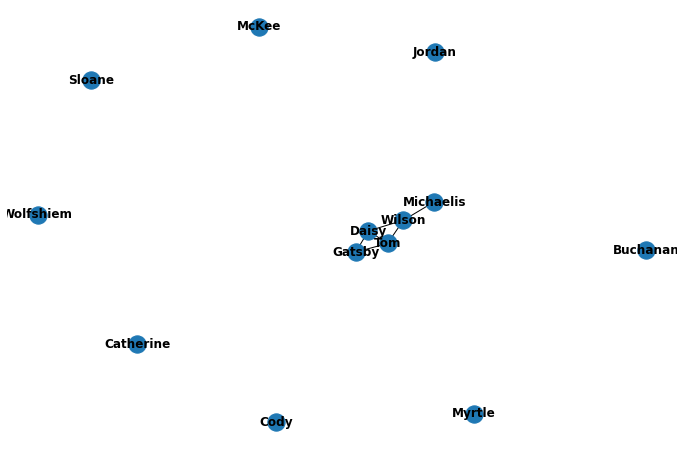

In [37]:
f, ax = plt.subplots(figsize=(12, 8))

G = nx.Graph(ax=ax)
G.add_nodes_from(name_list)
G.add_edges_from(interact.loc[:, ['entity', 'target']].values)
nx.draw(G, with_labels=True, font_weight='bold')

This graph shows the various interactions amongst characters (displayed as nodes). The edge nodes indicate some form of interaction. The more close the character's nodes are to one another, the stronger the interaction is. The more centered a character's node is in this graph, the more central the character is to the plot of the novel. This makes a lot of sense looking at the graph. As we see, Gatsby, Tom, Daisy, Wilson, and Michaelis are centered and the closest to one another, indicating importance of character and their close relationship. Tom and Daisy are very close to one another due to the nature of their relationship. We can also see that Gatsby is close to both Tom and Daisy since he is in love with Daisy and is disliked by Tom for that reason. Wilson is Myrtle's last name. It is interesting that Wilson appears in the middle rather than the name Myrtle for that reason. But we can see how Tom and Daisy are both connected to Wilson (Myrtle) since Tom was having an affair with her and Daisy found out. Wilson could also stand for George Wilson, Myrtle's husband, in which case the connection between Tom and Daisy would still make sense due to the affair. Lastly, we see that Wilson is connected to Michaelis. Michaelis is George Wilson's friend who owns a coffee shop next to the asheaps. Because of their friendship, it leads me to think that perhaps the Wilson that is centered is more geared towards George as opposed to Myrtle. Regardless, it is obvious why the characters that are in the middle are located there. It also is obvious why the nodes towards the outside of the graph are located there as well.

In [38]:
all_characters = ['Jay','Gatsby','Tom','Daisy','Buchanan','Nick','Carraway','Myrtle','Wilson','Jordan','Baker','Meyer','Wolfsheim','George','Gatz','Klipspringer','Trimalchio']

In [39]:
interact = pd.DataFrame()

lemmatizer = WordNetLemmatizer()

for name in all_characters:
    for i in np.argwhere([pos[0] == name])[:,1]:
        if 'VB' in pos[1,i+1]:
            for j in range(2, 10):
                if pos[0, i+j] in all_characters:
                    df = pd.DataFrame.from_dict({'entity': [pos[0,i]], 'verb': [pos[0,i+1]],
                                                 'target':[pos[0,i+j]], 'startpos': i, 'endpos':i+j})
                    interact = pd.concat([interact, df], ignore_index=True)

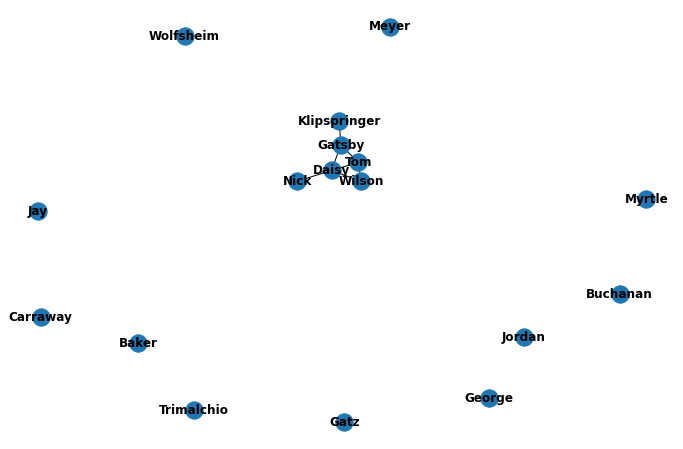

In [40]:
f, ax = plt.subplots(figsize=(12, 8))

G2 = nx.Graph(ax=ax)
G2.add_nodes_from(all_characters)
G2.add_edges_from(interact.loc[:, ['entity', 'target']].values)
nx.draw(G2, with_labels=True, font_weight='bold')

plt.savefig('./data_out/file1/character-interaction')


I gathered the names of all of the characters from the novel using Google and reran the model to see if the graph would appear significantly different. The main difference in this instance is that we see Nick is also locateed in the middle and is connected to Daisy. It makes sense that the connection to Daisy exists due to the nature of their relationship. However, it is interesting that theree is no connection between Nick and Gatsby. There is a lot of important plot between the two characters that is necessary and critical for the novel, so I would've expected a more prominent relationship drawn out between the two.

Note: when I tried to make this graph with all of their full names, I was not able to have any node-to-node connection. I believe that the cause for this is that the novel rarely mentions each character by their full name and rather refers to them either by first or last name.

## Novel Summary with NLP Techniques

In [41]:
#converting Text To Sentences
import nltk
sentence_list = nltk.sent_tokenize(txt)  
#sentence_list

In [42]:
stopwords = nltk.corpus.stopwords.words('english')

word_frequencies = {}  
for word in nltk.word_tokenize(txt):  
    if word not in stopwords and word not in ".":
        if word not in word_frequencies.keys():
            word_frequencies[word] = 1
        else:
            word_frequencies[word] += 1
#print((word_frequencies))
#word frequencies as dictionary

In [43]:
series = pd.Series(word_frequencies)
df = pd.DataFrame(series)
df = df.reset_index() #resetting index - need index (words) as a column
df=df.rename(columns={"index": "Word/Token", 0: "Count"}) #renaming columns
df.to_csv('{}/Great-Gatsby-Weighted-Freq.csv'.format(data_out))

In [44]:
df

,Word/Token,Count
0,In,32
1,younger,2
2,vulnerable,1
3,years,35
4,father,8
...,...,...
6801,matter—tomorrow,1
6802,morning—,1
6803,boats,1
6804,current,1


To create a summary of the novel, we must first find the weighted frequency of occurrences of all the words. This can be done by finding the weighted frequency of every word, as done above in df, and then dividing its frequency by the frequency of the most common word. This step will be done next. 

In [45]:
#maximum frequency (most common word)

df_top10 = df.sort_values(ascending = False, by =['Count'] )[:10]
df_top10

,Word/Token,Count
19,",",2961
13,“,1456
20,”,1454
7,I,1374
8,’,1345
374,?,328
152,Gatsby,250
27,He,244
304,said,233
586,Tom,188


In [46]:
df_top10[df_top10['Word/Token']=='Gatsby']

,Word/Token,Count
152,Gatsby,250


Looking at the top 10 frequent words, we can see that the first 6 are punctuation marks. Therefore, we select 250 as our most frequent count. The word "Gatsby" appears in the novel the most frequent at a value of 250.

In [47]:
#divide the number of occurances of all the words by the frequency of the most occurring word (250)

for word in word_frequencies.keys():  
    word_frequencies[word] = (word_frequencies[word]/250)


In [48]:
sentence_scores = {}  
for sent in sentence_list:  
    for word in nltk.word_tokenize(sent.lower()):
        if word in word_frequencies.keys():
            if len(sent.split(' ')) < 30:
                if sent not in sentence_scores.keys():
                    sentence_scores[sent] = word_frequencies[word]
                else:
                    sentence_scores[sent] += word_frequencies[word]
#sentence_scores

In [49]:
#getting the summary
import heapq  
summary_sentences = heapq.nlargest(10, sentence_scores, key=sentence_scores.get)
summary = ' '.join(summary_sentences)  
print(summary)

“Orderi di Danilo,” ran the circular legend, “Montenegro, Nicolas Rex.” “Turn it.” “Major Jay Gatsby,” I read, “For Valour Extraordinary.” “Here’s another thing I always carry. Son-of-a-bitch didn’t even stopus car.” “There was two cars,” said Michaelis, “one comin’, one goin’, see?” “Going where?” asked the policeman keenly. “Either you ought to be more careful, or you oughtn’t to drive at all.” “I am careful.” “No, you’re not.” “Well, other people are,” she said lightly. “By the way, Mr. Gatsby, I understand you’re an Oxford man.” “Not exactly.” “Oh, yes, I understand you went to Oxford.” “Yes—I went there.” A pause. He wears a pink suit.” “Nevertheless he’s an Oxford man.” “Oxford, New Mexico,” snorted Tom contemptuously, “or something like that.” “Listen, Tom. “M-a-v—” the policeman was saying, “—o—” “No, r—” corrected the man, “M-a-v-r-o—” “Listen to me!” muttered Tom fiercely. “Look here, old sport,” he broke out surprisingly, “what’s your opinion of me, anyhow?” A little overwhe

The output `summary` is a summary of the novel. As we can see, the summary is randomly generated using the values calculated prior. Interestingly enough, the summary does highlight some important aspects of the novel. For example, the 'car' is mentioned. The car was super important in the novel since it was what killed Myrtle and led to a cascade of events. Similarly, the concept of education and class is brought up by the mention of Gatsby being an "Oxford man". His education helps show where he belongs in society. More on this, Gatsby's quote of "you don't make much money, do you" also contributes to the class division. There is clearly an emphasis on the rich vs the poor. Lastly, Gatsby called people "old sport" a lot in the novel. Even this aspect seems to be included here as there is a qupte of Gatby saying "Look here, old sport". Although the summary of the novel is no where near perfect, for a program that had no prior knowledge of the plot of the novel, it does a fairly decent job at capturing important elements. 


# Sentiment Analysis

## Sentiment of Each Sentence in the Novel

In [50]:
df_sentence = pd.DataFrame(sentence_list,columns=['Sentence'])
df_sentence

,Sentence
0,In my young...
1,"“Whenever you feel like criticizing anyone,” h..."
2,"In consequence, I’m inclined to reserve all ju..."
3,The abnormal mind is quick to detect and attac...
4,Most of the confidences were unsought—frequent...
...,...
2434,"And as I sat there brooding on the old, unknow..."
2435,"He had come a long way to this blue lawn, and ..."
2436,He did not know that it was already behind him...
2437,"Gatsby believed in the green light, the orgast..."


In [51]:
from pattern.en import sentiment
sentiment_list = []
for i in df_sentence['Sentence']:
    word = sentiment(i)
    sentiment_list.append(word)
    

In [52]:
df_sent = pd.DataFrame(sentiment_list)
joint = pd.concat([df_sentence, df_sent], axis=1)
joint=joint.rename(columns={0: "Sentiment Score", 1: "Subjectivity"}) #renaming columns
joint

,Sentence,Sentiment Score,Subjectivity
0,In my young...,0.000000,0.333333
1,"“Whenever you feel like criticizing anyone,” h...",0.500000,0.687500
2,"In consequence, I’m inclined to reserve all ju...",0.085000,0.330000
3,The abnormal mind is quick to detect and attac...,0.016667,0.570000
4,Most of the confidences were unsought—frequent...,0.064286,0.464286
...,...,...,...
2434,"And as I sat there brooding on the old, unknow...",0.090000,0.426667
2435,"He had come a long way to this blue lawn, and ...",-0.183333,0.266667
2436,He did not know that it was already behind him...,-0.137500,0.525000
2437,"Gatsby believed in the green light, the orgast...",0.066667,0.375000


In [53]:
joint.to_csv('{}/Great-Gatsby-Subjectivity-And-Sentiment-SENTENCES.csv'.format(data_out))

With the pattern package, the sentiment object is given to find the polarity and subjectivity of a text.

The polarity can be positive or negative and ranges between -1 to 1. This can also be called the 'Sentiment Score' of the text. This looks for positive and negative adjectives, and gives the text a score accordingly. 

Subjectivity value can be between 0 and 1. Subjectivity looks at if the text is an opinion or if it is factual. The higher the subjectivity, the more opinion based the text is. 

In [54]:
joint.sort_values(ascending = False, by = ['Sentiment Score','Subjectivity'])[:20].style.background_gradient()

,Sentence,Sentiment Score,Subjectivity
1088,"Gatsby, his hands still in his pockets, was reclining against the mantelpiece in a strained counterfeit of perfect ease, even of boredom.",1.000000,1.000000
1279,“I’m delighted that you dropped in.” As though they cared!,0.875000,0.700000
976,It’s a great advantage not to drink among hard-drinking people.,0.800000,0.750000
2246,"“If he’d of lived, he’d of been a great man.",0.800000,0.750000
2336,He was always great for that.,0.800000,0.750000
1160,After his embarrassment and his unreasoning joy he was consumed with wonder at her presence.,0.800000,0.200000
889,Handsome to look at and a perfect gentleman.” “Yes.” “He’s an Oggsford man.” “Oh!” “He went to Oggsford College in England.,0.750000,1.000000
2176,"She showed a surprising amount of character about it too—looked at the coroner with determined eyes under that corrected brow of hers, and swore that her sister had never seen Gatsby, that her sister was completely happy with her husband, that her sister had been into no mischief whatever.",0.750000,0.750000
59,"The lawn started at the beach and ran towards the front door for a quarter of a mile, jumping over sundials and brick walks and burning gardens—finally when it reached the house drifting up the side in bright vines as though from the momentum of its run.",0.700000,0.800000
1014,"“Your place looks like the World’s Fair,” I said.",0.700000,0.900000


Looking at the top 20 words and their sentiment and subjectivity scores.

In [55]:
joint.sort_values(ascending = False, by = ['Sentiment Score','Subjectivity'])[:5].style.background_gradient()

,Sentence,Sentiment Score,Subjectivity
1088,"Gatsby, his hands still in his pockets, was reclining against the mantelpiece in a strained counterfeit of perfect ease, even of boredom.",1.000000,1.000000
1279,“I’m delighted that you dropped in.” As though they cared!,0.875000,0.700000
976,It’s a great advantage not to drink among hard-drinking people.,0.800000,0.750000
2246,"“If he’d of lived, he’d of been a great man.",0.800000,0.750000
2336,He was always great for that.,0.800000,0.750000


In [56]:
joint['Sentiment Score'].describe()


count    2439.000000
mean        0.038130
std         0.222878
min        -1.000000
25%        -0.031881
50%         0.000000
75%         0.125595
max         1.000000
Name: Sentiment Score, dtype: float64

The sentiment score as mentioned ranges from -1 to 1. Between the minimum and maximum values, 25% of the sentences had a sentiment score of -0.031881. 50% had a sentiment score of 0, which means a neutral sentence. 75% of the sentences had a sentiment score of 0.125595. 

In [57]:
joint['Subjectivity'].describe()


count    2439.000000
mean        0.344623
std         0.301023
min         0.000000
25%         0.000000
50%         0.350000
75%         0.550000
max         1.000000
Name: Subjectivity, dtype: float64

The subjectivity score as mentioned ranges from 0 to 1. Between the minimum and maximum values, 25% of the sentences had a subjectivity score of 0. 50% had a subjectivity score of 0.350000. Lastly, 75% of the sentences had a subjectivity score of 0.550000. 

## Sentiment of Each Word/Token in the Novel

In [58]:
from pattern.en import sentiment
sentiment_list2 = []
for i in df['Word/Token']:
    word = sentiment(i)
    sentiment_list2.append(word)

In [59]:
df_word = pd.DataFrame(sentiment_list2)
joint2 = pd.concat([df, df_word], axis=1)
joint2=joint2.rename(columns={0: "Sentiment Score", 1: "Subjectivity"}) #renaming columns
joint2

,Word/Token,Count,Sentiment Score,Subjectivity
0,In,32,0.0,0.0
1,younger,2,0.0,0.0
2,vulnerable,1,-0.5,0.5
3,years,35,0.0,0.0
4,father,8,0.0,0.0
...,...,...,...,...
6801,matter—tomorrow,1,0.0,0.0
6802,morning—,1,0.0,0.0
6803,boats,1,0.0,0.0
6804,current,1,0.0,0.4


In [60]:
joint2.to_csv('{}/Great-Gatsby-Subjectivity-And-Sentiment-TOKENS.csv'.format(data_out))

In [61]:
joint2.sort_values(ascending = False, by = ['Sentiment Score','Subjectivity'])[:20].style.background_gradient()

,Word/Token,Count,Sentiment Score,Subjectivity
490,perfect,4,1.000000,1.000000
1170,impressive,2,1.000000,1.000000
1415,perfectly,3,1.000000,1.000000
2231,wonderful,1,1.000000,1.000000
6506,impressively,1,1.000000,1.000000
6788,greatest,1,1.000000,1.000000
1468,best,6,1.000000,0.300000
2986,best.,1,1.000000,0.300000
2236,brilliant,1,0.900000,1.000000
1469,beautiful,7,0.850000,1.000000


As we did with sentences, we can look at the sentiment score and subjectivity of each token. This is slightly less revealing than looking at the sentence structure, so in the next part of this analysis we will move back to looking at the sentiment of sentences using different packages and methods.

In [62]:
joint2['Subjectivity'].describe()


count    6806.000000
mean        0.066812
std         0.215982
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: Subjectivity, dtype: float64

In [63]:
joint2['Sentiment Score'].describe()


count    6806.000000
mean        0.003458
std         0.136045
min        -1.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: Sentiment Score, dtype: float64

## Sentiment of Sentences Looking using VADER Library and Sentiment Intensity Analyzer

In [64]:
#  VADER library and Sentiment Intensity Analyzer

from nltk.sentiment.vader import SentimentIntensityAnalyzer
import nltk
#nltk.download('vader_lexicon')

sid=nltk.sentiment.vader.SentimentIntensityAnalyzer()

VADER is a library that stands for "Valence Aware Dictionary and Sentiment Reasoner" and is used to determine a sentiment score for words in Python. It is one of the many ways to determine the sentiment of words and returns 4 values. These values are as follows:
- pos: the probability of a positive sentiment
- neu: the probability of a neutral sentiment
- neg: the probability of a negative sentiment
- compound: the normalized compound score which calculates the sum of the ratings and takes values from -1 to 1

Pos, neu, and neg are probabilities and add up to 1. 

In [65]:
# Get intensity scores of each sentence
df_sentence['Score']=df_sentence.Sentence.apply(lambda x: sid.polarity_scores(x))

# Place scores in own columns
df_sentence['CompScore']=df_sentence.Score.apply(lambda x: x.get("compound"))
df_sentence['PosScore']=df_sentence.Score.apply(lambda x: x.get("pos"))
df_sentence['NegScore']=df_sentence.Score.apply(lambda x: x.get("neg"))
df_sentence['NeuScore']=df_sentence.Score.apply(lambda x: x.get("neu"))

# With scores extracted, the original score field can be removed
df_sentence = df_sentence.drop(["Score"], axis=1)

# Adding Sentiment Flags
df_sentence['PosFlag'] = df_sentence.CompScore.apply(lambda x: 1 if x >= 0.05 else 0)
df_sentence['NegFlag'] = df_sentence.CompScore.apply(lambda x: 1 if x <= -0.05 else 0)
df_sentence['NeuFlag'] = df_sentence.CompScore.apply(lambda x: 1 if x < 0.05 and x > -0.05 else 0)

# Confirm scores are
df_sentence.head(20)
df_sentence.mean()['CompScore']

0.044993521935219355

In [66]:
df_sentence

,Sentence,CompScore,PosScore,NegScore,NeuScore,PosFlag,NegFlag,NeuFlag
0,In my young...,-0.2944,0.000,0.091,0.909,0,1,0
1,"“Whenever you feel like criticizing anyone,” h...",0.8126,0.164,0.031,0.805,1,0,0
2,"In consequence, I’m inclined to reserve all ju...",0.2874,0.132,0.065,0.803,1,0,0
3,The abnormal mind is quick to detect and attac...,-0.2960,0.000,0.049,0.951,0,1,0
4,Most of the confidences were unsought—frequent...,-0.3818,0.000,0.048,0.952,0,1,0
...,...,...,...,...,...,...,...,...
2434,"And as I sat there brooding on the old, unknow...",0.0258,0.039,0.000,0.961,0,0,1
2435,"He had come a long way to this blue lawn, and ...",-0.2975,0.071,0.114,0.815,0,1,0
2436,He did not know that it was already behind him...,0.0000,0.000,0.000,1.000,0,0,1
2437,"Gatsby believed in the green light, the orgast...",0.0000,0.000,0.000,1.000,0,0,1


In [67]:
df_sentence.to_csv('{}/Great-Gatsby-Sentiment-Scores-VADER.csv'.format(data_out))

In [68]:
print('There are', df_sentence['PosFlag'].sum(), "positive sentences,", \
      df_sentence['NegFlag'].sum(), "negative sentences, and", \
      df_sentence['NeuFlag'].sum(), "neutral sentences")
print('This is a total of', \
      df_sentence['PosFlag'].sum()+df_sentence['NegFlag'].sum()+df_sentence['NeuFlag'].sum(), "sentences")

There are 836 positive sentences, 643 negative sentences, and 960 neutral sentences
This is a total of 2439 sentences


In [69]:
# Creating tables of positive and negative sentences

# Pull out rows with positive flag only
PosTable = df_sentence.loc[df_sentence['PosFlag'] == 1].reset_index()\
    .drop(['index'], axis=1)

 #Pull out rows with negative flag only
NegTable = df_sentence.loc[df_sentence['NegFlag'] == 1].reset_index()\
    .drop(['index'], axis=1)

In [70]:
PosTable

,Sentence,CompScore,PosScore,NegScore,NeuScore,PosFlag,NegFlag,NeuFlag
0,"“Whenever you feel like criticizing anyone,” h...",0.8126,0.164,0.031,0.805,1,0,0
1,"In consequence, I’m inclined to reserve all ju...",0.2874,0.132,0.065,0.803,1,0,0
2,Reserving judgements is a matter of infinite h...,0.4588,0.444,0.000,0.556,1,0,0
3,"And, after boasting this way of my tolerance, ...",0.2960,0.128,0.000,0.872,1,0,0
4,Conduct may be founded on the hard rock or the...,0.7750,0.256,0.044,0.700,1,0,0
...,...,...,...,...,...,...,...,...
831,By God it was awful—” I couldn’t forgive him o...,0.7808,0.318,0.000,0.682,1,0,0
832,I spent my Saturday nights in New York because...,0.7096,0.126,0.000,0.874,1,0,0
833,Probably it was some final guest who had been ...,0.4019,0.105,0.000,0.895,1,0,0
834,And as the moon rose higher the inessential ho...,0.3182,0.062,0.000,0.938,1,0,0


In [71]:
NegTable

,Sentence,CompScore,PosScore,NegScore,NeuScore,PosFlag,NegFlag,NeuFlag
0,In my young...,-0.2944,0.000,0.091,0.909,0,1,0
1,The abnormal mind is quick to detect and attac...,-0.2960,0.000,0.049,0.951,0,1,0
2,Most of the confidences were unsought—frequent...,-0.3818,0.000,0.048,0.952,0,1,0
3,I am still a little afraid of missing somethin...,-0.7380,0.000,0.248,0.752,0,1,0
4,"Only Gatsby, the man who gives his name to thi...",-0.3182,0.052,0.100,0.849,0,1,0
...,...,...,...,...,...,...,...,...
638,"One night I did hear a material car there, and...",-0.2960,0.000,0.128,0.872,0,1,0
639,"On the last night, with my trunk packed and my...",-0.2500,0.073,0.104,0.823,0,1,0
640,"On the white steps an obscene word, scrawled b...",-0.2732,0.076,0.107,0.817,0,1,0
641,"He had come a long way to this blue lawn, and ...",-0.2975,0.071,0.114,0.815,0,1,0


In [72]:
PosTable.to_csv('{}/Great-Gatsby-VADER-PosTable.csv'.format(data_out))
NegTable.to_csv('{}/Great-Gatsby-VADER-NegTable.csv'.format(data_out))

In [73]:
from nltk.tokenize import sent_tokenize
# Creating lists of positive/negative words
PosList=[]
NegList=[]

# Loop to tokenize words into one huge list
for x in PosTable.Sentence:
    PosList.extend(sent_tokenize(x))    

for x in NegTable.Sentence:
    NegList.extend(sent_tokenize(x))

In [74]:
# Creating positive and negative Bags of Words

def word_bayes(words):
    return dict([(word, True) for word in words.split() if word not in stopwords])

PosBayes = [(word_bayes(sentence), 'positive') for sentence in PosList]
NegBayes = [(word_bayes(sentence), 'negative') for sentence in NegList]

## Using Naive Bayes Classifier to Provide Most Notable Text Features of Positive and Negative Sentiment

In [75]:
#Open Naive Bayes Classifier Package
from nltk.classify import NaiveBayesClassifier

# Set Splits
PosSplit=int(PosTable.PosFlag.sum()/2)
NegSplit=int(NegTable.NegFlag.sum()/2)

#Train Model
sentiment_classifier = NaiveBayesClassifier.train(PosBayes[:PosSplit]+NegBayes[:NegSplit])

In [76]:
accuracy = nltk.classify.util.accuracy(sentiment_classifier, PosBayes[:PosSplit]+NegBayes[:NegSplit])*100
accuracy

99.86468200270636

In [77]:
print("Set accuracy: %.3f" % (accuracy,))

Set accuracy: 99.865


In [78]:
accuracy2 = nltk.classify.util.accuracy(sentiment_classifier, PosBayes[PosSplit:]+NegBayes[NegSplit:])*100

In [79]:
print("Set accuracy: %.3f" % (accuracy2,))

Set accuracy: 62.568


In [80]:
sentiment_classifier.show_most_informative_features()

Most Informative Features
                    room = True           negati : positi =      7.4 : 1.0
                   shook = True           negati : positi =      5.6 : 1.0
                     see = True           positi : negati =      5.4 : 1.0
                  broken = True           negati : positi =      4.8 : 1.0
                  called = True           negati : positi =      4.8 : 1.0
                   eyes. = True           negati : positi =      4.8 : 1.0
                  forget = True           negati : positi =      4.8 : 1.0
                  nodded = True           negati : positi =      4.8 : 1.0
                     way = True           positi : negati =      4.4 : 1.0
                Buchanan = True           negati : positi =      3.9 : 1.0


This shows the ratio of occurences in negative to positive for every word. For example, we can see that the term "room" appears 7.4 times more as often in negative reviews than it does in positive reviews. This allows us to see the most informative features of our novel. 